In [17]:
!pip install -q rfdetr

## 1. Train RF-DETR object detection model
This initializes the RFDETRBase model, sets up a callback function to save performance metrics after each epoch, and then begins training on the Cash Counter dataset for 50 epochs. The script also enables early_stopping to prevent overfitting.

In [1]:
from rfdetr import RFDETRBase

model = RFDETRBase()
history = []

def callback2(data):
	history.append(data)

model.callbacks["on_fit_epoch_end"].append(callback2)

model.train(dataset_dir="Cash Counter.v11-yolov8s.coco", epochs=50, batch_size=4, lr=1e-4, early_stopping=True)

Loading pretrain weights


num_classes mismatch: model has 90 classes, but your dataset has 11 classes
reinitializing your detection head with 11 classes.


TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir output' and open http://localhost:6006/ in browser.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=11, grad_accum_steps=4, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=4, weight_decay=0.0001, epochs=50, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-base.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[2, 5, 8, 11], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=3, dim_feedforward=2048, hidden_dim=256, sa_nheads=8, ca_nheads=

Epoch: [0]  [  0/167]  eta: 1:23:56  lr: 0.000100  class_error: 97.32  loss: 8.8874 (8.8874)  loss_ce: 1.1278 (1.1278)  loss_bbox: 0.4548 (0.4548)  loss_giou: 0.5656 (0.5656)  loss_ce_0: 1.1020 (1.1020)  loss_bbox_0: 0.5542 (0.5542)  loss_giou_0: 0.6294 (0.6294)  loss_ce_1: 1.1260 (1.1260)  loss_bbox_1: 0.4727 (0.4727)  loss_giou_1: 0.5780 (0.5780)  loss_ce_enc: 1.0848 (1.0848)  loss_bbox_enc: 0.5309 (0.5309)  loss_giou_enc: 0.6610 (0.6610)  loss_ce_unscaled: 1.1278 (1.1278)  class_error_unscaled: 97.3166 (97.3166)  loss_bbox_unscaled: 0.0910 (0.0910)  loss_giou_unscaled: 0.2828 (0.2828)  cardinality_error_unscaled: 3422.7500 (3422.7500)  loss_ce_0_unscaled: 1.1020 (1.1020)  loss_bbox_0_unscaled: 0.1108 (0.1108)  loss_giou_0_unscaled: 0.3147 (0.3147)  cardinality_error_0_unscaled: 3764.0000 (3764.0000)  loss_ce_1_unscaled: 1.1260 (1.1260)  loss_bbox_1_unscaled: 0.0945 (0.0945)  loss_giou_1_unscaled: 0.2890 (0.2890)  cardinality_error_1_unscaled: 3795.5000 (3795.5000)  loss_ce_enc_unsca

KeyboardInterrupt: 

## 2.Visualize performance of the trained model
The cell below uses pandas and matplotlib to analyze and visualize the performance of a trained object detection model

--- Comprehensive Performance Metrics Table ---
    Accuracy  Precision  Recall  F1-Score    mAP
0      0.393      0.512   0.863     0.643  0.393
1      0.440      0.590   0.829     0.689  0.440
2      0.582      0.736   0.855     0.791  0.582
3      0.648      0.784   0.877     0.828  0.648
4      0.745      0.868   0.899     0.883  0.745
5      0.767      0.908   0.882     0.894  0.767
6      0.824      0.942   0.905     0.923  0.824
7      0.808      0.956   0.880     0.917  0.808
8      0.800      0.956   0.872     0.912  0.800
9      0.862      0.979   0.903     0.939  0.862
10     0.836      0.974   0.887     0.929  0.836
11     0.843      0.979   0.890     0.932  0.843
12     0.854      0.976   0.904     0.939  0.854
13     0.840      0.976   0.892     0.932  0.840
14     0.842      0.970   0.896     0.932  0.842
15     0.846      0.979   0.897     0.937  0.846
16     0.842      0.969   0.888     0.927  0.842
17     0.815      0.974   0.864     0.916  0.815
18     0.809      0.9

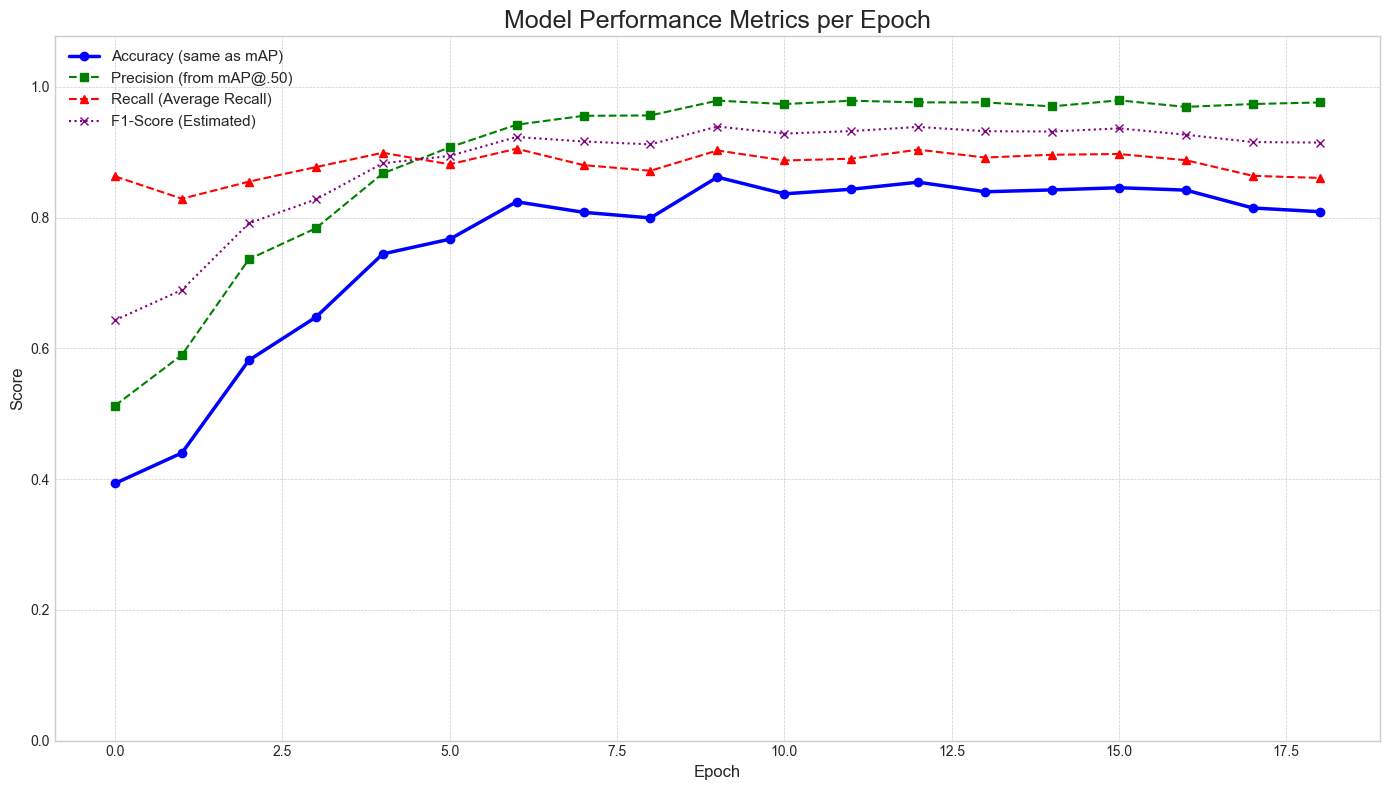

In [37]:
import pandas as pd
import numpy as np # Import numpy for safe calculations
import matplotlib.pyplot as plt

# Assume 'history_df' is your DataFrame with the 109 columns from training

# --- 1. Extract and Calculate All Requested Metrics ---

# mAP and Accuracy (using mAP, the primary COCO metric at index 0)
history_df['mAP'] = history_df['test_coco_eval_bbox'].apply(lambda x: x[0])
history_df['Accuracy'] = history_df['mAP'] # mAP is the best measure of overall accuracy

# Precision (using mAP@.50 at index 1 as a strong proxy)
history_df['Precision'] = history_df['test_coco_eval_bbox'].apply(lambda x: x[1])

# Recall (using Average Recall at index 8)
history_df['Recall'] = history_df['test_coco_eval_bbox'].apply(lambda x: x[8])

# F1-Score (Estimated from our Precision and Recall values)
# Formula: F1 = 2 * (Precision * Recall) / (Precision + Recall)
p = history_df['Precision']
r = history_df['Recall']
# Use np.divide to avoid errors if (p + r) is zero
history_df['F1-Score'] = np.divide(2 * p * r, p + r, out=np.zeros_like(2 * p * r), where=(p + r) != 0)


# --- 2. Display the Final Metrics in a Table ---
# Select only the columns you asked for to display
final_metrics = history_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'mAP']]

print("--- Comprehensive Performance Metrics Table ---")
# .round(3) makes the table easier to read
print(final_metrics.round(3))


# --- 3. Plot All Metrics on a Single Chart ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

plt.plot(final_metrics.index, final_metrics['Accuracy'], label='Accuracy (same as mAP)', color='blue', marker='o', linewidth=2.5)
plt.plot(final_metrics.index, final_metrics['Precision'], label='Precision (from mAP@.50)', color='green', marker='s', linestyle='--')
plt.plot(final_metrics.index, final_metrics['Recall'], label='Recall (Average Recall)', color='red', marker='^', linestyle='--')
plt.plot(final_metrics.index, final_metrics['F1-Score'], label='F1-Score (Estimated)', color='purple', marker='x', linestyle=':')

plt.title('Model Performance Metrics per Epoch', fontsize=18)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, max(1.0, final_metrics.max().max() * 1.1)) # Adjust y-axis to fit all data
plt.legend(fontsize=11)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## 3. Visualize the model's learning curve
Plot the training loss and the validation loss on a single graph, allowing for a direct comparison of how the model's error rate changed on both seen and unseen data throughout the training epochs. This is essential for diagnosing issues like overfitting.

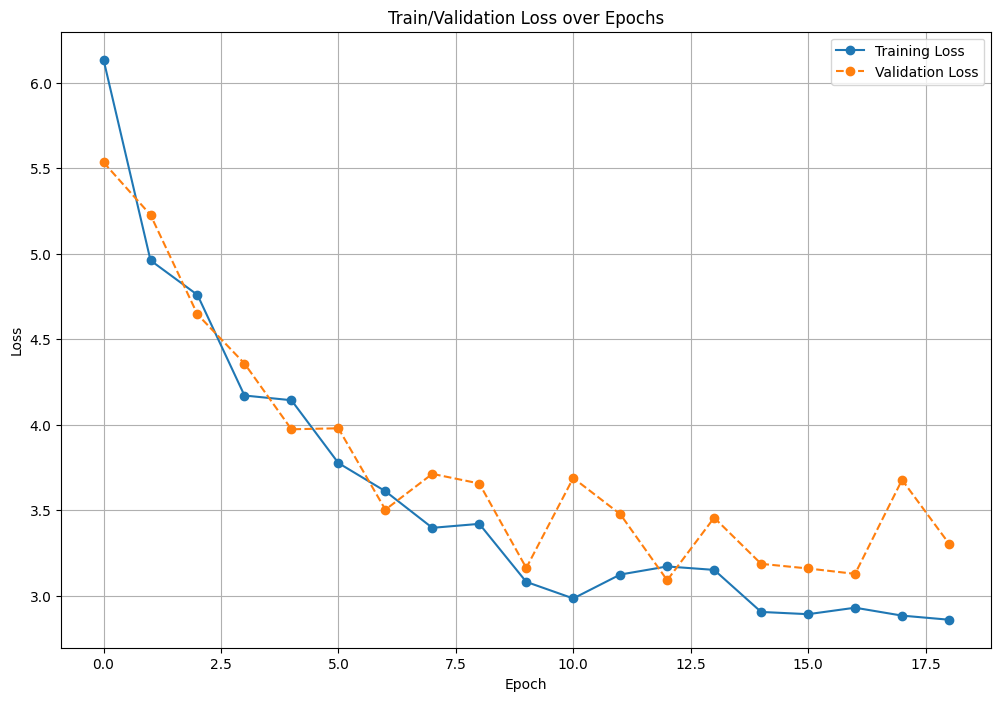

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(history)

plt.figure(figsize=(12, 8))

plt.plot(
	df['epoch'],
	df['train_loss'],
	label='Training Loss',
	marker='o',
	linestyle='-'
)

plt.plot(
	df['epoch'],
	df['test_loss'],
	label='Validation Loss',
	marker='o',
	linestyle='--'
)

plt.title('Train/Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

## 4. load the object detection dataset that is in the COCO format

In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_coco(
	images_directory_path="Cash Counter.v11-yolov8s.coco/test",
	annotations_path="Cash Counter.v11-yolov8s.coco/test/_annotations.coco.json",
)

## 5. Evaluate the trained model

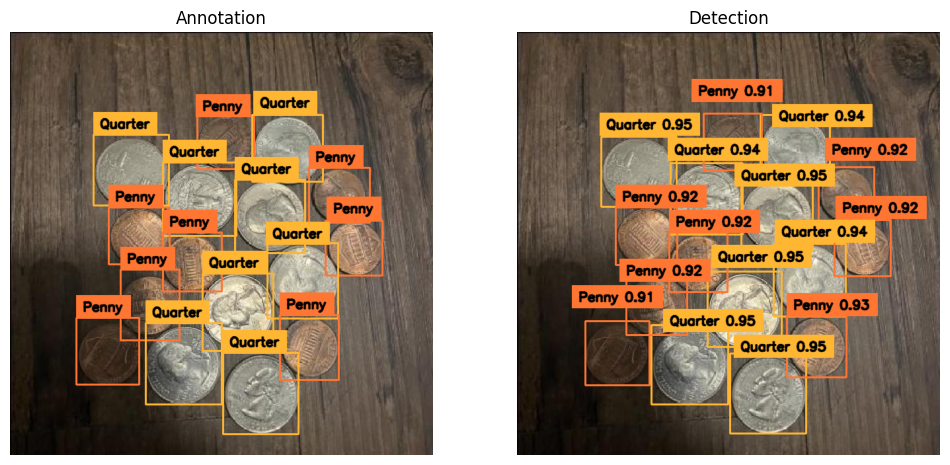

In [10]:
path, image, annotations = ds[7]

from rfdetr import RFDETRBase
from rfdetr.util.coco_classes import COCO_CLASSES
import supervision as sv
import numpy as np
from PIL import Image

image = Image.open(path)

detections = model.predict(image, threshold=0.5)

text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)

bbox_annotator = sv.BoxAnnotator(thickness=thickness)
label_annotator = sv.LabelAnnotator(
	text_color=sv.Color.BLACK,
	text_scale=text_scale,
	text_thickness=thickness,
	smart_position=True)

annotations_labels = [
	f"{ds.classes[class_id]}"
	for class_id
	in annotations.class_id
]

detections_labels = [
	f"{ds.classes[class_id]} {confidence:.2f}"
	for class_id, confidence
	in zip(detections.class_id, detections.confidence)
]

annotation_image = image.copy()
annotation_image = bbox_annotator.annotate(annotation_image, annotations)
annotation_image = label_annotator.annotate(annotation_image, annotations, annotations_labels)

detections_image = image.copy()
detections_image = bbox_annotator.annotate(detections_image, detections)
detections_image = label_annotator.annotate(detections_image, detections, detections_labels)

sv.plot_images_grid(images=[annotation_image, detections_image], grid_size=(1, 2), titles=["Annotation", "Detection"])

## 6.generate a two-part visual summary of the model's training performance.

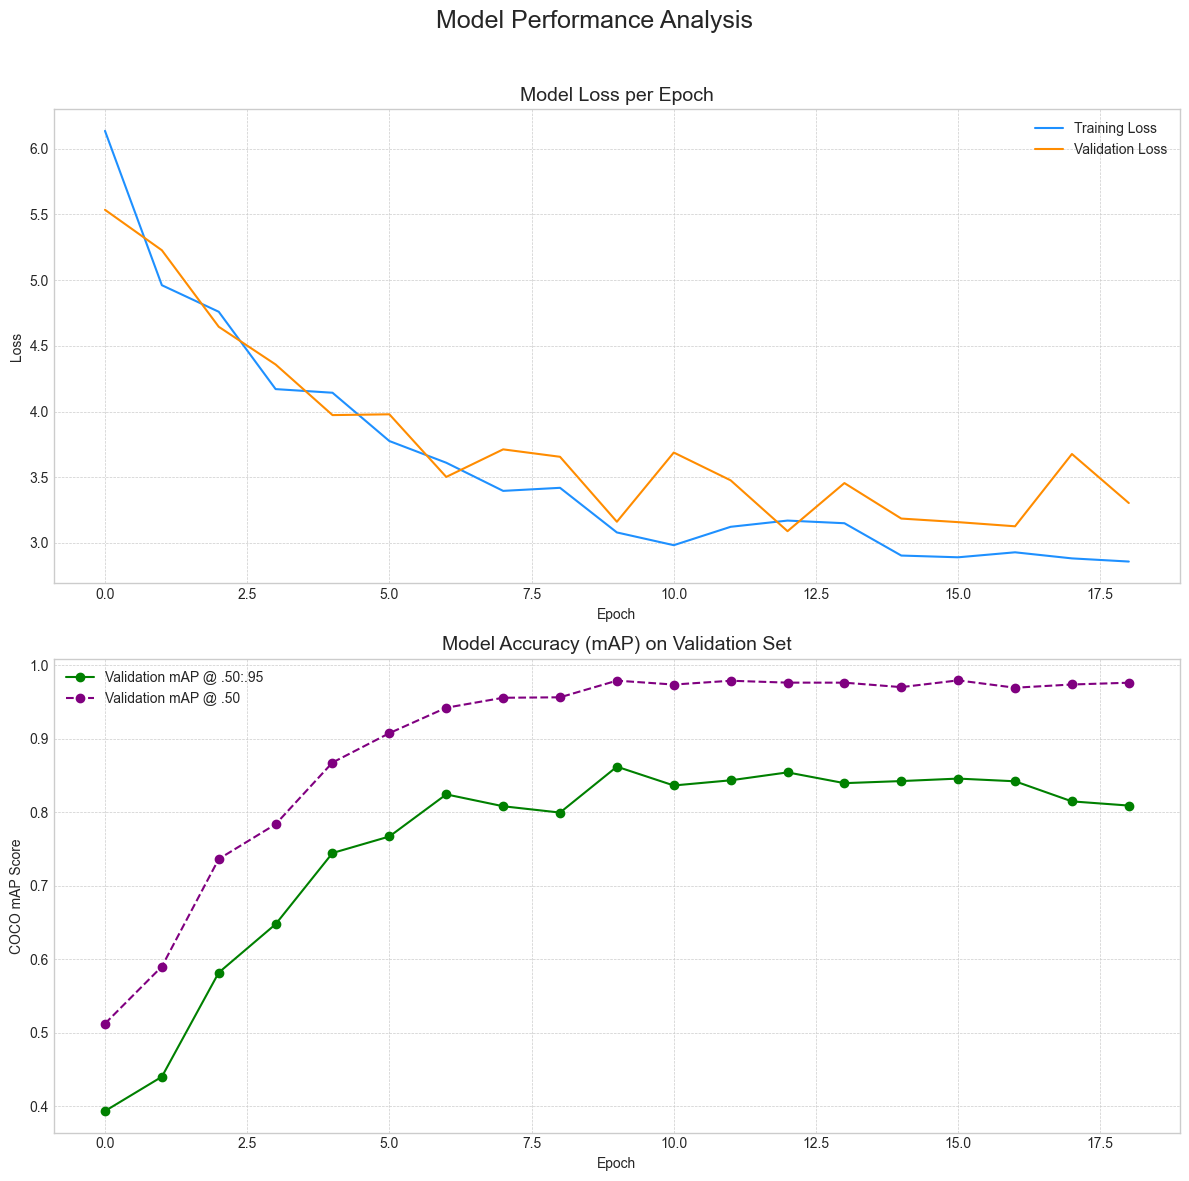

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'history_df' is the DataFrame containing your training history

# --- Extract the main mAP scores from the 'test_coco_eval_bbox' list ---
# The .apply() method lets us run a function on each row of the column.
# We're pulling out the first two elements from the list of COCO scores.
history_df['map'] = history_df['test_coco_eval_bbox'].apply(lambda x: x[0])
history_df['map50'] = history_df['test_coco_eval_bbox'].apply(lambda x: x[1])


## --- Create the Visualizations ---
plt.style.use('seaborn-v0_8-whitegrid')
# Create a figure with 2 rows of plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
fig.suptitle('Model Performance Analysis', fontsize=18)


## 1. Plot Training vs. Validation Loss 📉
ax1.plot(history_df.index, history_df['train_loss'], label='Training Loss', color='dodgerblue')
ax1.plot(history_df.index, history_df['test_loss'], label='Validation Loss', color='darkorange')
ax1.set_title('Model Loss per Epoch', fontsize=14)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)


## 2. Plot Model Accuracy (mAP) 🎯
ax2.plot(history_df.index, history_df['map'], label='Validation mAP @ .50:.95', color='green', marker='o')
ax2.plot(history_df.index, history_df['map50'], label='Validation mAP @ .50', color='purple', marker='o', linestyle='--')
ax2.set_title('Model Accuracy (mAP) on Validation Set', fontsize=14)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('COCO mAP Score')
ax2.legend()
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)


# Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()